In [201]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import datasets, transforms
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class Flowers(Dataset):
    def __init__(self, data_dir, transform=None):
        self.image_paths = []
        self.labels = []
        self.transform = transform

        for filename in sorted(os.listdir(data_dir)):
            image_path = os.path.join(data_dir, filename)
            self.image_paths.append(image_path)
            label = int(filename.split('_')[0])
            self.labels.append(label)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        label = torch.tensor(label, dtype=torch.long)

        return image, label


def plot_from_dataset(dataset, shuffle=True, cmap=None):
    dataloader = DataLoader(dataset, batch_size=16, shuffle=shuffle)
    images, labels = next(iter(dataloader))
    images = np.transpose(images, (0, 2, 3, 1))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(4, 4))

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap=cmap)
        ax.axis('off')
        if hasattr(dataset, 'classes'):
            ax.set_title(dataset.classes[labels[i]], fontsize=12)
        else:
            ax.set_title(labels[i], fontsize=12)

    plt.show()


def show_img_transform(transform, cmap=None):
    data_dir = r"D:\code\data\FlowerColor\flowers\flowers"
    dataset = Flowers(data_dir, transform=transform)
    subset = Subset(dataset, [i for i in range(4)])
    plot_from_dataset(subset, False, cmap)

## 调整图像大小

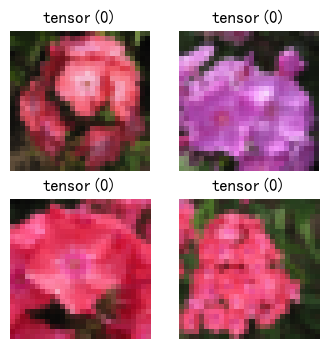

In [202]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])
show_img_transform(transform)

## 灰度图

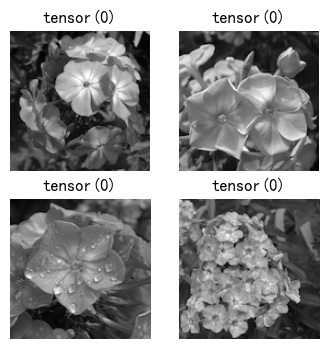

In [203]:
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
])
show_img_transform(transform, cmap='gray')

## 标准化

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


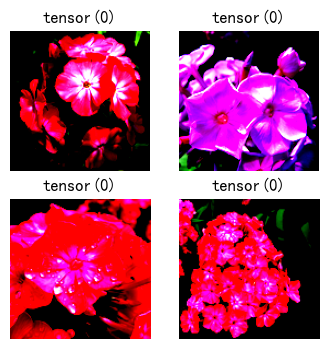

In [204]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
show_img_transform(transform)

## 随机旋转

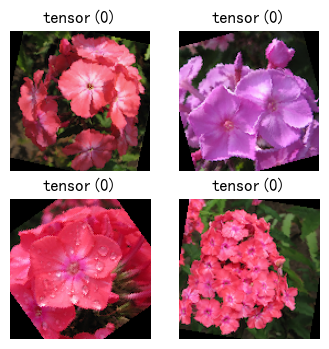

In [205]:
transform = transforms.Compose([
    transforms.RandomRotation(degrees=90),
    transforms.ToTensor(),
])
show_img_transform(transform)

## 中心剪裁

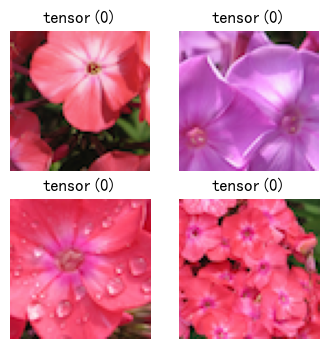

In [206]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
])
show_img_transform(transform)

## 随机裁剪

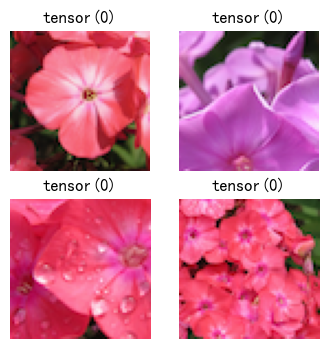

In [207]:
transform = transforms.Compose([
    transforms.Resize((128, (128))),
    transforms.RandomCrop(64),
    transforms.ToTensor(),
])
show_img_transform(transform)

## 高斯模糊

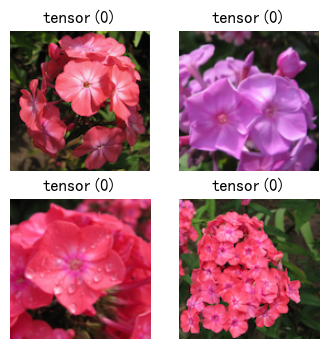

In [209]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.GaussianBlur((5, 5)),
    transforms.ToTensor(),
])
show_img_transform(transform)

## 亮度对比度饱和度色调

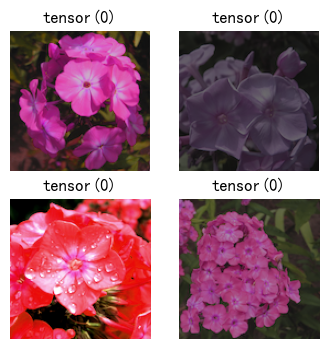

In [212]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ColorJitter(
        brightness=(0.5, 1.5),
        contrast=(0.5, 1.5),
        saturation=(0.5, 1.5),
        hue=(-0.1, 0.1)
    ),
    transforms.ToTensor(),
])
show_img_transform(transform)

## 水平翻转

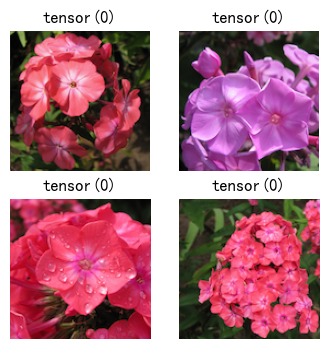

In [213]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor(),
])
show_img_transform(transform)

## 垂直翻转

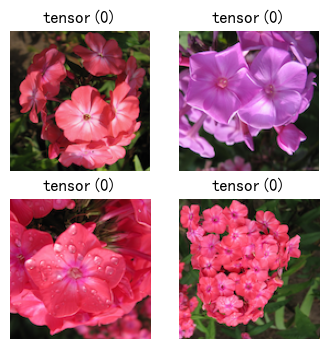

In [214]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomVerticalFlip(p=1),
    transforms.ToTensor(),
])
show_img_transform(transform)

## 自定义方法

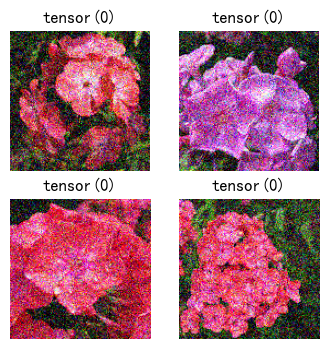

In [215]:
class AddNoise():
    def __init__(self, noise_factor=0.2):
        self.noise_factor = noise_factor

    def __call__(self, image):
        noisy = image + torch.randn_like(image) * self.noise_factor
        noisy = torch.clamp(noisy, 0.0, 1.0)
        return noisy


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    AddNoise(),
])
show_img_transform(transform)